In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
n_pts = 500
centers = np.array([[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]])
X, y = datasets.make_blobs(n_samples=n_pts, random_state=0, centers=centers, cluster_std = 0.4)


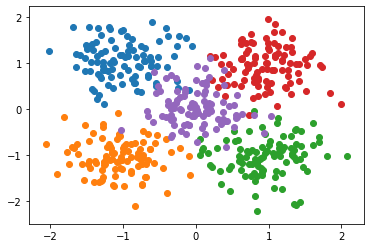

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1]);
plt.scatter(X[y==1, 0], X[y==1, 1]);
plt.scatter(X[y==2, 0], X[y==2, 1]);
plt.scatter(X[y==3, 0], X[y==3, 1]);
plt.scatter(X[y==4, 0], X[y==4, 1]);

In [4]:
data = pd.DataFrame(X, columns=['X1', 'X2'])
y_cat = pd.get_dummies(y)
hot_encoded = pd.concat([data, y_cat], axis=1)
hot_encoded.head()

,X1,X2,0,1,2,3,4
0,1.531113,0.959487,0,0,0,1,0
1,-1.015713,0.532763,1,0,0,0,0
2,-0.454187,-1.275780,0,1,0,0,0
3,0.421386,-0.679881,0,0,1,0,0
4,-0.096276,-1.016903,0,1,0,0,0


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(2,), activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.1), loss='categorical_crossentropy', metrics= ['accuracy'])

In [6]:
model.fit(x=X, y=np.array(y_cat), verbose=1, batch_size=50, epochs=5)

Train on 500 samples
Epoch 1/5
500/500 [==============================] - 1s 2ms/sample - loss: 0.8067 - accuracy: 0.8120
Epoch 2/5
500/500 [==============================] - 0s 52us/sample - loss: 0.4518 - accuracy: 0.8960
Epoch 3/5
500/500 [==============================] - 0s 56us/sample - loss: 0.3205 - accuracy: 0.9380
Epoch 4/5
500/500 [==============================] - 0s 67us/sample - loss: 0.2639 - accuracy: 0.9520
Epoch 5/5
500/500 [==============================] - 0s 63us/sample - loss: 0.2324 - accuracy: 0.9560


## Plot Decision Regions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



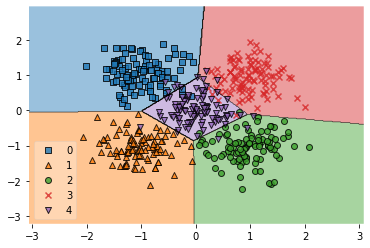

In [7]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y_pred = self.model(X)
        return np.argmax(y_pred, axis=1)


# fit keras_model
keras_model_no_ohe = Onehot2Int(model)

plot_decision_regions(X, y, clf=keras_model_no_ohe, legend=3);

,0,1,2,3,4,Class
0,2.468031,0.093884,1.798968,54.255886,41.383232,3


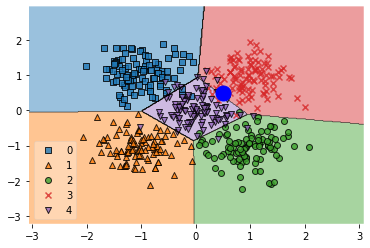

In [18]:
plot_decision_regions(X, y, clf=keras_model_no_ohe, legend=3);
points = np.array([[0.5, 0.5]])
predicted = model.predict(points)
classes = np.argmax(predicted, axis=1)

plt.plot(points[:, 0], points[:, 1], marker='o', color='b', markersize=15)
predictions = pd.concat([pd.DataFrame(predicted) * 100,
                         pd.DataFrame(classes, columns=["Class"])],
                        axis=1)
predictions